In [4]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

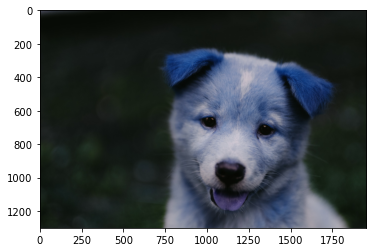

In [5]:
img = cv2.imread(r"C:\Users\admin\Desktop\Python_CV\DATA\00-puppy.jpg")
plt.imshow(img)

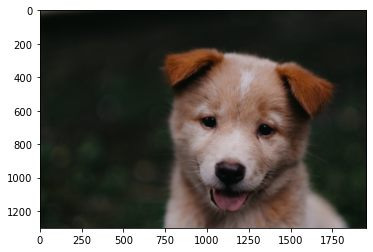

In [6]:
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)

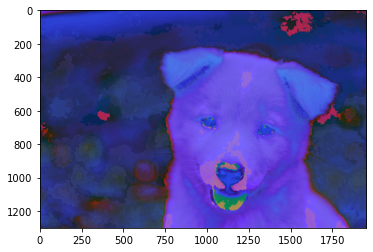

In [10]:
img = cv2.cvtColor(img, cv2.COLOR_RGB2HLS)
plt.imshow(img)

# Blending and Pasting Images

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

C:\Users\admin\anaconda3\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\admin\anaconda3\lib\site-packages\numpy\.libs\libopenblas.FB5AE2TYXYH2IJRDKGDGQ3XBKLKTF43H.gfortran-win_amd64.dll
C:\Users\admin\anaconda3\lib\site-packages\numpy\.libs\libopenblas.WCDJNK7YVMPZQ2ME2ZZHJJRJ3JIKNDB7.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


In [2]:
img1 = cv2.imread(r"C:\Users\admin\Desktop\Python_CV\DATA\dog_backpack.png")
img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)
img2 = cv2.imread(r"C:\Users\admin\Desktop\Python_CV\DATA\watermark_no_copy.png")
img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)

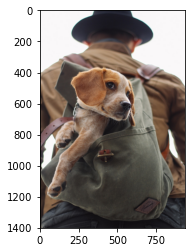

In [4]:
plt.imshow(img1)

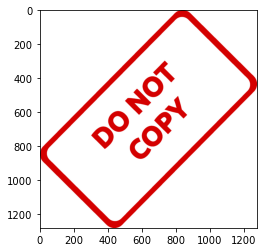

In [5]:
plt.imshow(img2)

In [6]:
img1.shape

(1401, 934, 3)

In [7]:
img2.shape

(1280, 1277, 3)

### BENDING IMAGES OF THE SAME SIZE

In [8]:
img1 = cv2.resize(img1, (1200,1200))
img2 = cv2.resize(img2, (1200,1200))

(1200, 1200, 3)


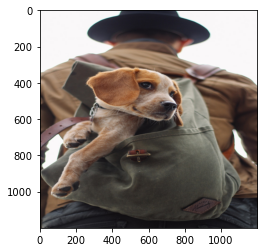

In [9]:
print(img1.shape)
plt.imshow(img1)

(1200, 1200, 3)


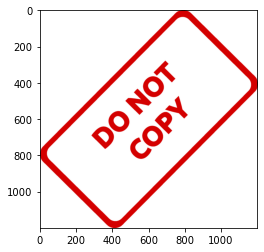

In [10]:
print(img2.shape)
plt.imshow(img2)

In [14]:
blended = cv2.addWeighted(src1=img1,alpha=0.2,src2=img2,beta=0.5,gamma=0)

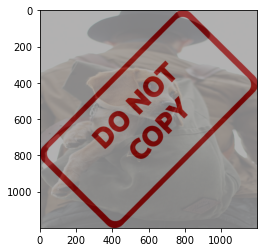

In [15]:
plt.imshow(blended)

### OVERLAY SMALL IMAGE ON TOP OF A LARGER IMAGE (NO BLENDING)
### NUMPY ASSIGNMENT

In [24]:
img1 = cv2.imread(r"C:\Users\admin\Desktop\Python_CV\DATA\dog_backpack.png")
img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)
img2 = cv2.imread(r"C:\Users\admin\Desktop\Python_CV\DATA\watermark_no_copy.png")
img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)

In [25]:
img2 = cv2.resize(img2, (600,600))

In [26]:
large_img = img1
small_img = img2

In [27]:
x_offset = 0
y_offset = 0

In [28]:
x_end = x_offset + small_img.shape[1] 
y_end = y_offset + small_img.shape[0]

In [29]:
large_img[y_offset:y_end, x_offset:x_end] = small_img

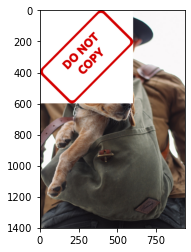

In [30]:
plt.imshow(large_img)

### BLEND TOGETHER IMAGES OF DIFFERENT SIZES*

In [31]:
img1 = cv2.imread(r"C:\Users\admin\Desktop\Python_CV\DATA\dog_backpack.png")
img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)
img2 = cv2.imread(r"C:\Users\admin\Desktop\Python_CV\DATA\watermark_no_copy.png")
img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)

In [32]:
img2 = cv2.resize(img2, (600,600))

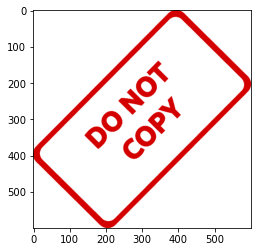

In [33]:
plt.imshow(img2)

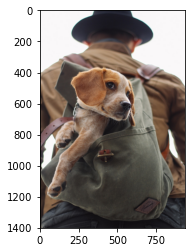

In [34]:
plt.imshow(img1)

In [35]:
img1.shape

(1401, 934, 3)

In [36]:
x_offset = 934-600
y_offset = 1401-600

In [37]:
img2.shape

(600, 600, 3)

In [38]:
rows,cols,channels = img2.shape

In [39]:
rows

600

In [40]:
cols

600

In [41]:
channels

3

In [42]:
roi = img1[y_offset:1401, x_offset:934]

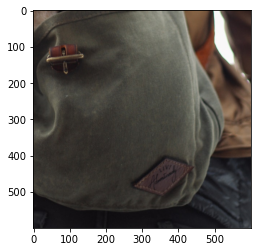

In [43]:
plt.imshow(roi)

In [44]:
img2gray = cv2.cvtColor(img2, cv2.COLOR_RGB2GRAY)

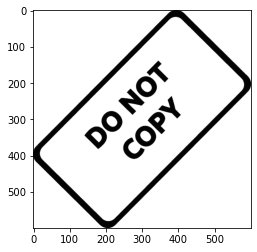

In [46]:
plt.imshow(img2gray,cmap="gray")

In [47]:
mask_inv = cv2.bitwise_not(img2gray)

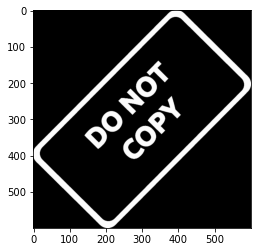

In [49]:
plt.imshow(mask_inv,cmap="gray")

In [51]:
mask_inv.shape

(600, 600)

In [52]:
import numpy as np

In [59]:
white_background = np.full(img2.shape,255, dtype=np.uint8)

In [60]:
white_background.shape

(600, 600, 3)

In [61]:
#White Background

In [62]:
bk = cv2.bitwise_or(white_background,white_background,mask=mask_inv)

In [63]:
bk.shape

(600, 600, 3)

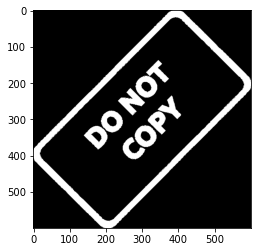

In [64]:
plt.imshow(bk)

In [66]:
fg = cv2.bitwise_or(img2,img2,mask=mask_inv)

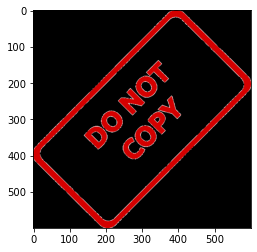

In [67]:
plt.imshow(fg)

In [68]:
final_roi = cv2.bitwise_or(roi,fg)

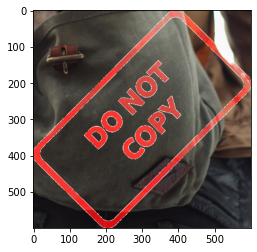

In [69]:
plt.imshow(final_roi)

In [73]:
large_img = img1
small_img = final_roi

In [74]:
large_img[y_offset:y_offset+small_img.shape[0], x_offset:x_offset+small_img.shape[1]] = small_img

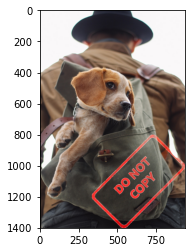

In [75]:
plt.imshow(large_img)